In [1]:
import sys

sys.path.append(r"C:\Users\48501\Desktop\src")

In [17]:
import fractions

import numpy as np
from numpy.typing import NDArray
from skimage import io, transform, color
from sklearn import metrics
from PIL import Image
from src.downsampling import rgb_downsample, nonlinear_downsample
from src.conv import image_interpolate, rgb_image_interpolate
from src import kernels

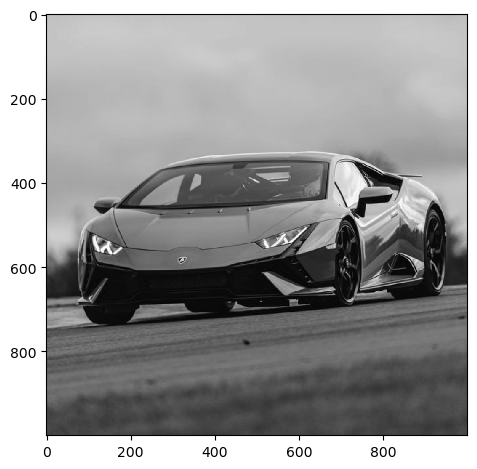

In [18]:
color_image = Image.open(r"C:\Users\48501\Desktop\nature.jpg")
color_image = np.array(color_image)

# Resize the image
color_image_resized = transform.resize(color_image, output_shape=(1000, 1000, 3))

# Convert the resized color image to grayscale
grey_image = color.rgb2gray(color_image_resized)

# Display the shapes
grey_image.shape, color_image_resized.shape

_ = io.imshow(grey_image)


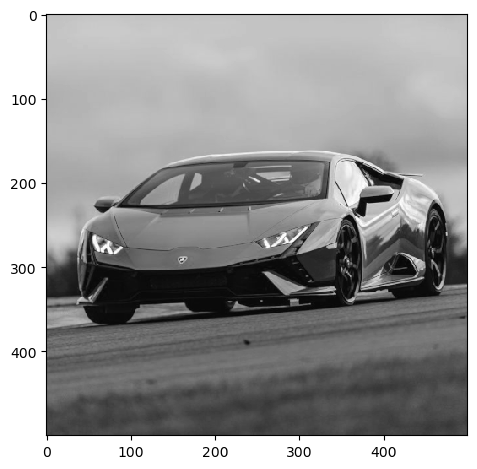

In [19]:
downsampled = nonlinear_downsample(grey_image, kernel_size=2, aggregate=np.max)
_ = io.imshow(downsampled)

In [20]:
downsampled.shape

(500, 500)

In [21]:
%%time

upsampled = image_interpolate(downsampled, kernel=kernels.linear_kernel, ratio=2)
upsampled.shape

CPU times: total: 2min 7s
Wall time: 32 s


(1000, 1000)

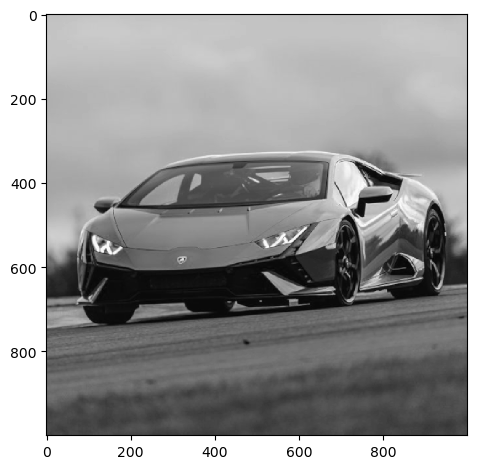

In [22]:
_ = io.imshow(upsampled)

In [27]:
original_shape = grey_image.shape
y_true_before = grey_image.flatten()
y_pred_before = transform.resize(grey_image, output_shape=original_shape).flatten()
mse_before = metrics.mean_squared_error(y_true=y_true_before, y_pred=y_pred_before)
print(f"MSE for original: {mse_before:.8f}")


original_shape = grey_image.shape
y_true_before = grey_image.flatten()
y_pred_before = transform.resize(downsampled, output_shape=original_shape).flatten()
mse_before = metrics.mean_squared_error(y_true=y_true_before, y_pred=y_pred_before)
print(f"MSE after downsampling: {mse_before:.8f}")

y_true_after = grey_image.flatten()
y_pred_after = transform.resize(upsampled, output_shape=original_shape).flatten()
mse_after = metrics.mean_squared_error(y_true=y_true_after, y_pred=y_pred_after)
print(f"MSE after upsampling: {mse_after:.8f}")


MSE for original: 0.00000000
MSE after downsampling: 0.00048374
MSE after upsampling: 0.00075955


In [25]:
y_true_after = grey_image.flatten()
y_pred_after = transform.resize(upsampled, output_shape=original_shape).flatten()
mse_after = metrics.mean_squared_error(y_true=y_true_after, y_pred=y_pred_after)
print(f"MSE after upsampling: {mse_after:.8f}")

MSE after upsampling: 0.00075955
